<a href="https://colab.research.google.com/github/PrabhnoorSingh122999/AirBNB_Bookings_Analysis/blob/main/EDA_NYC_AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# dataset imported from kaggle
nyc_df = pd.read_csv("AB_NYC_2019.csv")


In [ ]:
nyc_df.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(nyc_df.head())

   host_id neighbourhood_group neighbourhood  latitude  longitude  \
0     2787            Brooklyn    Kensington  40.64749  -73.97237   
1     2845           Manhattan       Midtown  40.75362  -73.98377   
2     4632           Manhattan        Harlem  40.80902  -73.94190   
3     4869            Brooklyn  Clinton Hill  40.68514  -73.95976   
4     7192           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews  \
0     Private room    149               1                  9   
1  Entire home/apt    225               1                 45   
2     Private room    150               3                  0   
3  Entire home/apt     89               1                270   
4  Entire home/apt     80              10                  9   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2  

In [ ]:
nyc_df.reviews_per_month.fillna(0, inplace=True)
print(nyc_df.isnull().any())

host_id                           False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


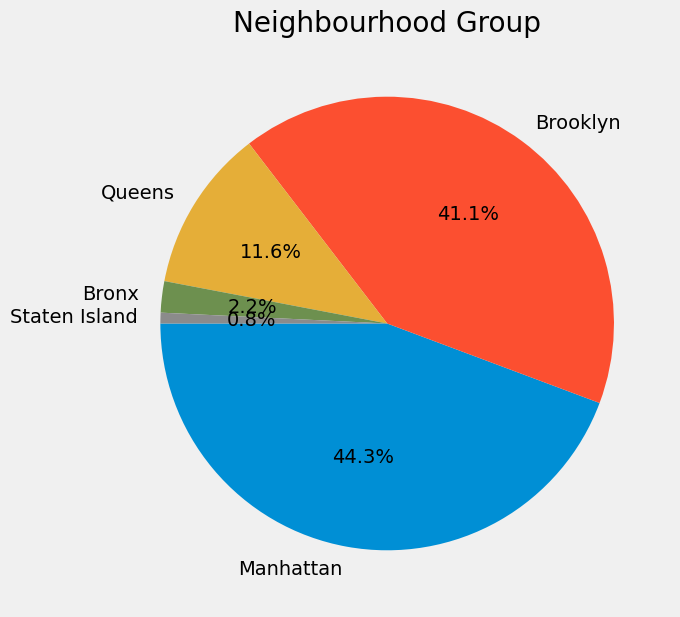

In [ ]:
# Exploration Data & Visualizing

plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

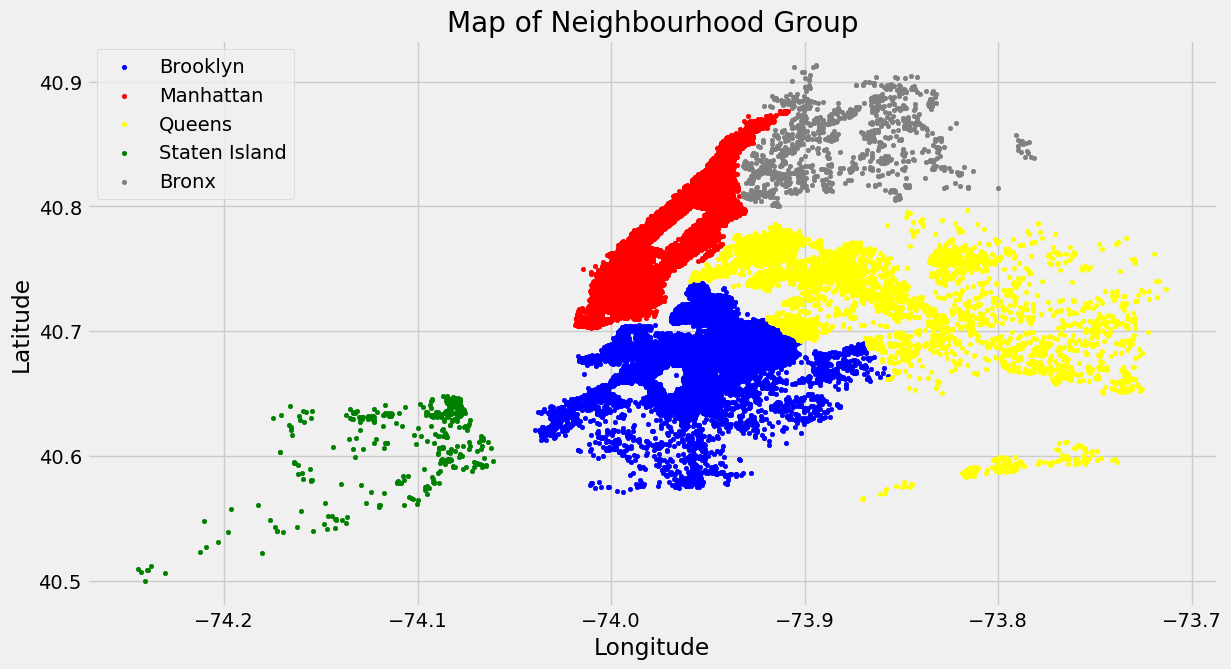

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")
g = plt.pie(nyc_df.neighbourhood_group.value_counts(), labels=nyc_df.neighbourhood_group.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.show()

ValueError: ignored

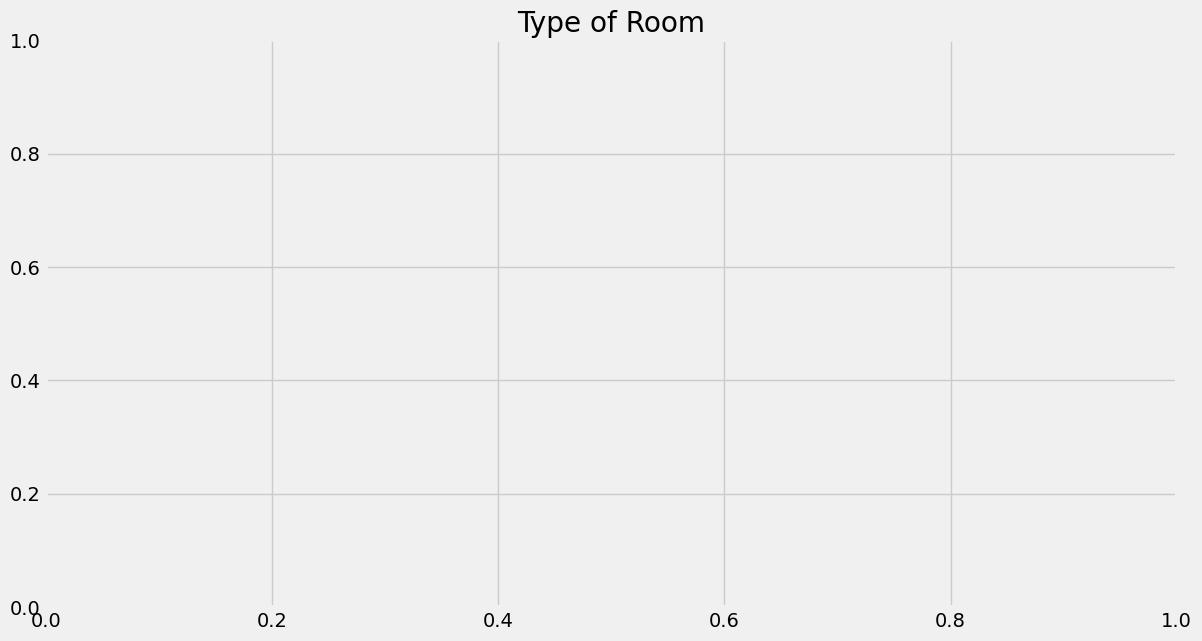

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(nyc_df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(nyc_df.neighbourhood_group,hue=nyc_df.room_type, palette="muted")
plt.show()

Neighbourhood Group vs. Availability Room

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=nyc_df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

Neighborhood Group Price Distribution

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Map of Price Distribution")
ax=nyc_df[nyc_df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = nyc_df[nyc_df.price<500])
plt.show()

In [ ]:
corr = nyc_df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

LINEAR REGRESSION


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
encode = preprocessing.LabelEncoder()

FIT LABEL ENCODER


In [ ]:
encode.fit(nyc_df.neighbourhood_group)
nyc_df.neighbourhood_group=encode.transform(nyc_df.neighbourhood_group)

transforms labels to normalized encoding


In [ ]:
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.neighbourhood)
nyc_df.neighbourhood=encode.transform(nyc_df.neighbourhood)
encode = preprocessing.LabelEncoder()
encode.fit(nyc_df.room_type)
nyc_df.room_type=encode.transform(nyc_df.room_type)
nyc_df.sort_values(by='price',ascending=True,inplace=True)

now train the linear regression model

In [ ]:
l_reg = LinearRegression()
X = nyc_df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = nyc_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
l_reg.fit(X_train,y_train)

price prediction

In [ ]:
predicts = l_reg.predict(X_test)
print("Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicts)))
print("R2 Score: ", r2_score(y_test,predicts) * 100)
print("Mean Absolute Error: ", mean_absolute_error(y_test,predicts))
print("Mean Squareroot Error: ", mean_squared_error(y_test,predicts))

output from the model

In [ ]:
# diff bw actual and predicted price
lr_pred_df = pd.DataFrame({
‘actual_values’: np.array(y_test).flatten(),
‘predicted_values’: predicts.flatten()}).head(20)


In [ ]:
# visualise it then
x = lr_pred_df.index
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, lr_pred_df.actual_values, width, label='Actual Values')
rects2 = ax.bar(x + width/2, lr_pred_df.predicted_values, width, label='Predicted Values')
ax.set_ylabel('Price')
ax.set_title('Actual Vs Predicted for Linear Regression')
ax.set_xticks(x)
ax.legend()
fig.tight_layout()
plt.show()